# Finding Parkinson's Patients using XGBoost Algorithm

In this notebook, we will explore the application of the XGBoost algorithm for detecting Parkinson's disease in patients. Parkinson's disease is a neurodegenerative disorder that affects movement, and early detection is crucial for effective treatment and management.

XGBoost is a powerful machine learning algorithm known for its efficiency and accuracy in handling complex classification tasks. By training a model on a dataset of features extracted from patient data, we can leverage XGBoost to predict the presence of Parkinson's disease based on the given input.

The primary objectives of this notebook are as follows:
- Understand the basics of XGBoost algorithm
- Prepare and preprocess the dataset for training
- Train an XGBoost model using the prepared data
- Evaluate the performance of the model
- Use the trained model to predict the presence of Parkinson's disease in new patients

Let's get started!


## Step 2: Importing Packages

To begin our analysis and implementation of the XGBoost algorithm for Parkinson's disease detection, we need to import the necessary Python packages. These packages provide the required functionality and tools for data manipulation, machine learning, and evaluation. Let's import the following packages:

- **pandas:** A powerful data manipulation library that allows us to read, preprocess, and analyze datasets efficiently.

- **numpy:** A fundamental package for scientific computing in Python. It provides support for large, multi-dimensional arrays and various mathematical operations.

- **sklearn:** Also known as scikit-learn, this library provides a wide range of machine learning algorithms and tools for data preprocessing, model selection, and evaluation.

- **xgboost:** The XGBoost library itself, which we will use to train and evaluate our XGBoost model.

- **matplotlib:** A plotting library for creating visualizations in Python.

- **seaborn:** Another visualization library that provides enhanced aesthetics and statistical graphics.

To import these packages, we can use the following code snippet:

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Step 3: Read Data

In this step, we will read the data for our Parkinson's disease detection analysis. The dataset is typically stored in a CSV (Comma-Separated Values) file format. We will use the `pd.read_csv()` function from the pandas library to load the data into a DataFrame.

To read the data, we can use the following code snippet:


In [3]:
df = pd.read_csv('parkinsons.csv')

## Step 4: Overview of the DataFrame

Now that we have loaded the data into the `df` DataFrame, let's take a closer look at the structure and contents of our dataset. We can use the `head()` method to display the first few rows of the DataFrame.

To get an overview of the DataFrame, we can use the following code snippet:



In [4]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## Step 4: Summary of the DataFrame

To gain a comprehensive understanding of our dataset, let's generate a summary of the DataFrame using the `info()` method. This will provide us with essential information about the columns, data types, and missing values present in the dataset.

To generate the summary, we can use the following code snippet:



In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

## Step 5: Statistical Summary of the DataFrame

To gain insights into the numerical features of our dataset, we can generate a statistical summary using the `describe()` method. This will provide us with various statistical measures such as count, mean, standard deviation, minimum, maximum, and quartiles for each numerical column in the DataFrame.

To generate the statistical summary, we can use the following code snippet:



In [6]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


## Step 6: Verification of Null Values in the Dataset

To ensure the quality and integrity of our dataset, it's important to check for any missing values. We can use the combination of `isna()` and `sum()` methods to detect and count the number of null values in each column of the DataFrame.

The `isna()` method returns a DataFrame of the same shape as the input, where each element is a boolean value indicating whether it is a null value (`True`) or not (`False`). By chaining the `sum()` method after `isna()`, we can calculate the sum of null values for each column.

To verify if our dataset has any null values, we can use the following code snippet:



In [7]:
df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

## Step 7: Understanding Correlation using Heatmap Visualization

### Correlation

Correlation is a statistical measure that quantifies the relationship between two variables. It indicates how changes in one variable are associated with changes in another variable. Correlation values range from -1 to 1, where -1 represents a strong negative correlation, 1 represents a strong positive correlation, and 0 represents no correlation.

In the context of our dataset, analyzing the correlation between different features can provide insights into their relationships and potential predictive power. For example, we can examine the correlation between various symptoms or attributes related to Parkinson's disease and determine which ones are strongly associated with the disease.

### Heatmap

A heatmap is a graphical representation that uses color-coded cells to display data values. In the context of correlation analysis, a heatmap can visually represent the correlation matrix of a dataset. It provides a concise and intuitive way to identify the strength and direction of correlations between variables.

To generate a correlation heatmap for our dataset, we'll use the `corr()` method to calculate the correlation matrix and the seaborn library (`sns`) to create the heatmap visualization.

Here's the code snippet to generate the correlation heatmap:


<Axes: >

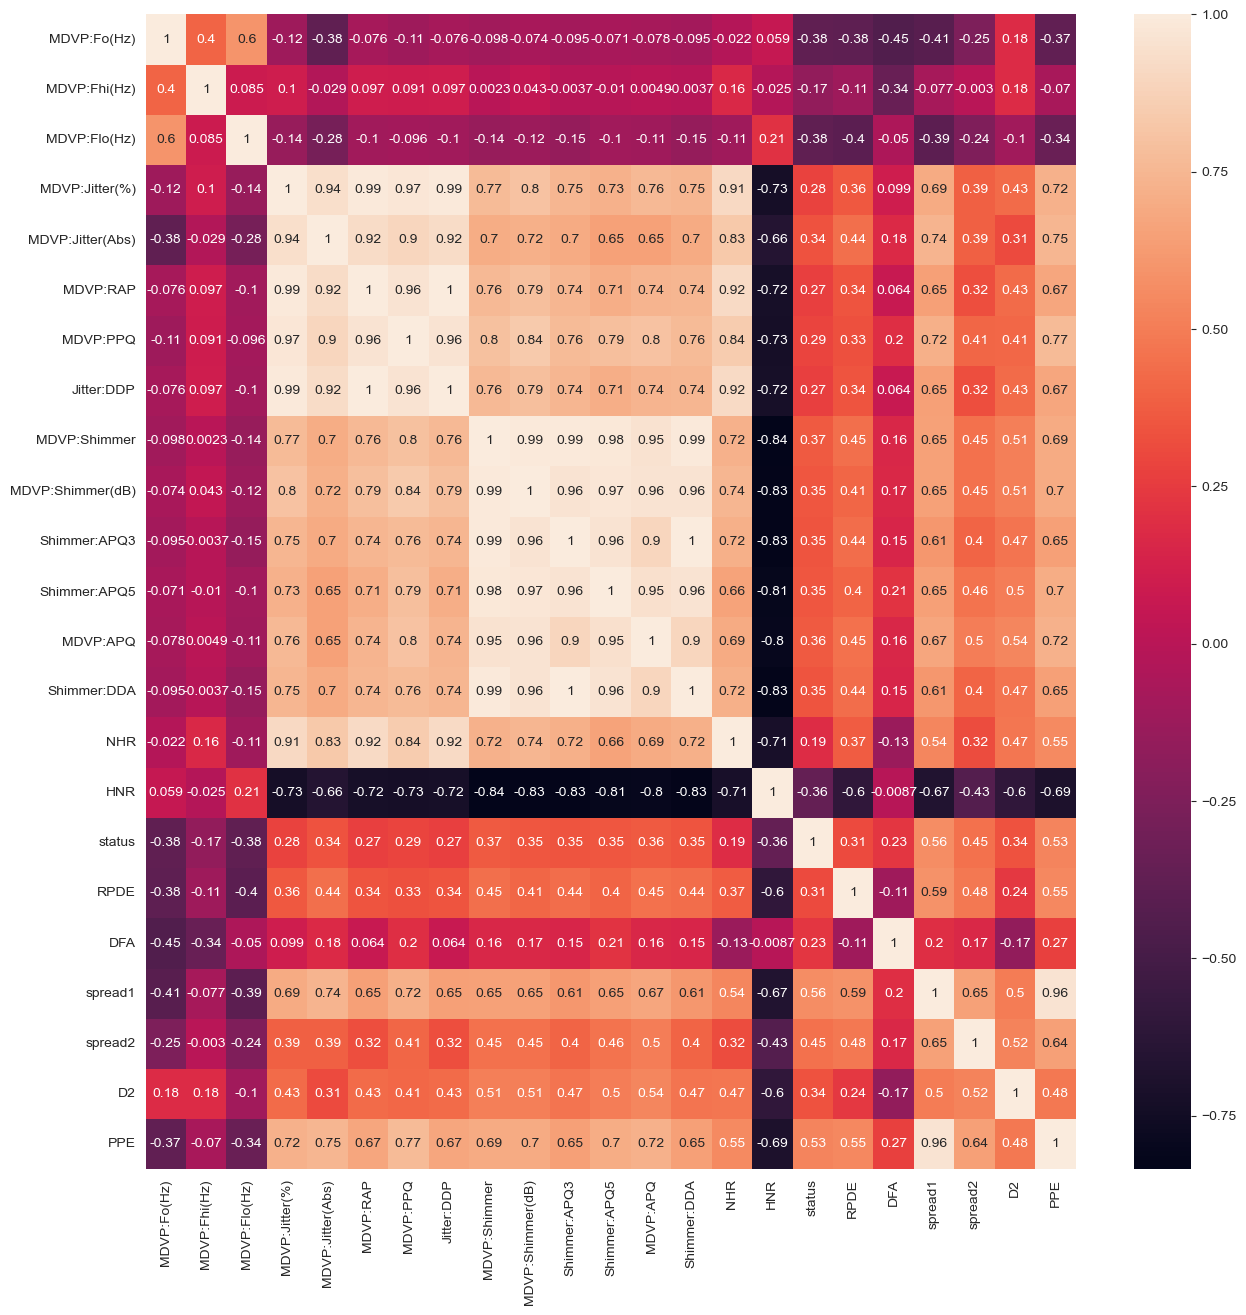

In [15]:
new_df=df.drop(columns="name")
corr_map=new_df.corr()
sns.set_style('darkgrid') 
# sns.set_style help to set color of the axes, whether a grid is enabled by default, and other aesthetic elements.
plt.figure(figsize=(15,15))
sns.heatmap(data=corr_map, annot=True)

## Step 8: Correlation of Target Label with Each Feature

To understand the relationship between the target label "status" and each feature in our dataset, we can calculate the correlation coefficient between them. This will help us identify which features have the strongest correlation with the target label.

We'll use the `corr()` method to calculate the correlation matrix for all features in the DataFrame, and then extract the correlation values for the target label using the `['status']` indexing.

Here's the code snippet to calculate the correlation of the target label with each feature and sort the correlation values in descending order:


In [16]:
correlation_values=new_df.corr()['status']
correlation_values.abs().sort_values(ascending=False)

status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Fo(Hz)         0.383535
MDVP:Flo(Hz)        0.380200
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
HNR                 0.361515
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)        0.166136
Name: status, dtype: float64

## Step 9: Extracting Features and Target Label

To prepare our dataset for further analysis or modeling, it's often necessary to separate the features (independent variables) from the target label (dependent variable). This separation allows us to focus on modeling the relationship between the features and predicting the target label accurately.

We'll extract the features and target label into two different dataframes using pandas indexing. The features dataframe will contain all the columns except the 'status' column, while the labels dataframe will only include the 'status' column.

Here's the code snippet to extract the features and target label into two different dataframes:



In [17]:
features=df.loc[:,df.columns!='status']
labels=df.loc[:,'status']

## Step 10: Analyzing the Count of People Affected and Not Affected

To gain insights into the distribution of the target label and understand the balance between people affected and not affected by Parkinson's disease, we can analyze the count of examples for each label.

Here's the code snippet to calculate and print the count of examples with label '0' (not affected) and label '1' (affected):

In [20]:
print("Examples with label '0': {}\n Examples with label '1': {}".format(labels[labels==0].count(), labels[labels==1].count()))

Examples with label '0': 48
 Examples with label '1': 147


## Step 11: Preprocessing Data with MinMax Scaler

To ensure that our data is on a consistent scale and to prevent certain features from dominating the analysis or modeling process, it's often necessary to perform data normalization or scaling.

One commonly used scaling technique is MinMaxScaler, which transforms the data to a specified range, typically between 0 and 1. In this step, we'll preprocess our data using MinMaxScaler.

Here's the code snippet to initialize the MinMaxScaler with a feature range of (-1, 1):



In [21]:
mm_scaler = MinMaxScaler(feature_range=(-1,1))

## Step 12: Fit and Transform with MinMax Scaler

In this step, we'll fit the MinMaxScaler to the feature dataframe and transform the data using the fitted scaler. This will scale the numerical features within the specified range.

Here's the code snippet to fit and transform the features dataframe using MinMaxScaler:


In [22]:
X = mm_scaler.fit_transform(features.drop('name', axis=1)) 
y = labels.values

## Step 13: Train-Test Split

To evaluate the performance of our model and assess its ability to generalize to unseen data, it's common practice to split the dataset into separate training and testing subsets. In this step, we'll perform the train-test split using the `train_test_split` function.
* `X, y`: The first parameter is the dataset you're selecting to use.
* `test_size`: This parameter specifies the size of the testing dataset.
* `random_state`: To save the state of train_test_split so that the radnom split generated is same every time.
* `train data`: 70% of total data
* `test_data`: 30% of total data

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

## Step 14: Model Training
In this step, you will train the XGBoost classifier using the training data.


In [25]:
xbg_model = XGBClassifier()
xbg_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## Step 15: Prediction on test data
Predict with `test data` using:

In [27]:
y_pred = xbg_model.predict(X_test)

## Step 16: Performance of our classification model using `confusion matix`
* In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix are highly dependable output matrix.
* A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known
* Its give summary of prediction results on a classification problem.
The number of correct and incorrect predictions are summarized with count values and broken down by each class.
* This is the key to the confusion matrix.
* The confusion matrix shows the ways in which your classification model is confused when it makes predictions.
* It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

### Sklearn's confusion matrix can be used as follow:

In [28]:
print(confusion_matrix(y_test, y_pred))

[[14  2]
 [ 1 42]]


### From our confusion matrix we can conclude that we have predict about 3 wrong prediction:
* 2 are False Negative
* 1 is False Positve
* That mean our model has classified 2 patients as negative even when they were positive and 1 patient as positive even if he was negative
* In Medical diagnosis we can deal with False Positives but we cannot use the results directly from a model that has higher number of False Negative at any cost
* So, what we do is tune(improve) our model and always try reduce False Negative as much as possible which untimately increases the model accuarcy

## Step 16: Our classification model accuracy score
* The most common metric for classification is accuracy, which is the fraction of samples predicted correctly
* Accuracy is the ratio of Total No. Correct prediction and Total No. of Predictions

In [29]:
print(accuracy_score(y_test, y_pred))

0.9491525423728814


#### Using XGBoost Classifier we have got about 94.91% which approximately 94.5% accuaracy